In [1]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

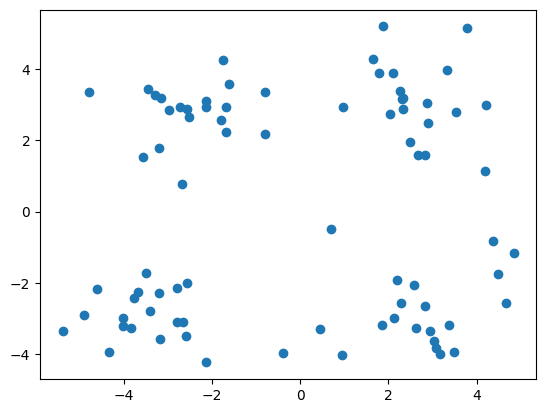

In [3]:
data = np.genfromtxt("kmeans.txt", delimiter = " ")

plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [8]:
def calDistance(vec1,vec2):
    return np.sqrt(sum((vec2 - vec1)**2))

def initCentroids(data, k):
    numSamples, dim = data.shape
    centroids = np.zeros((k, dim))
    for i in range(k):
        index = int(np.random.uniform(0, numSamples))
        centroids[i, :] = data[index, :]
    return centroids

def kmeans(data, k):
    numSamples = data.shape[0]
    # 样本属性，第一列保存该样本属于哪个蔟，第二列保存该样本跟它所属蔟的误差
    clusterData = np.array(np.zeros((numSamples, 2)))
    clusterChanged = True

    # 初始化质心
    centroids = initCentroids(data, k)

    while clusterChanged:
        clusterChanged = False
        for i in range(numSamples):
            minDist = 100000.0
            minIndex = 0
            for j in range(k):
                distance = calDistance(centroids[j, :], data[i, :])
                if distance < minDist:
                    minDist = distance
                    clusterData[i,1] = minDist
                    minIndex = j
            if clusterData[i, 0] != minIndex:
                clusterChanged = True
                clusterData[i, 0] = minIndex
        for j in range(k):
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个蔟所有的样本点
            pointsInCluster = data[cluster_index]
            centroids[j,:] = np.mean(pointsInCluster, axis=0) # 从列方向是，对每行的值，求一个平均值
    return centroids, clusterData       

def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim != 2:
        print("dimension of your data is not 2!!! beyond the scope of drawing!")
        return 1
    mark = ['or','ob','og','ok','^r','+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Your k  is too large to be draw !")
        return 1
    for i in range(numSamples):
        markIdx = int(clusterData[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[markIdx])

    mark = ['*r','*b','*g','*k','^b','+b', 'sb', 'db', '<b', 'pb']

    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)

    plt.show()
    

In [4]:
# setting k = 4
k = 4
model = MiniBatchKMeans(n_clusters=k)
model.fit(data)


D:\Softwares\Python3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=4)

In [5]:
centers = model.cluster_centers_
print(centers)

[[-2.47671587  2.81723792]
 [ 2.8830293  -2.70465222]
 [-3.41851179 -2.96145724]
 [ 2.60969361  3.17790644]]


## 做预测

In [6]:
results = model.predict(data)
print(results)

[3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2]


### 画图

In [9]:
def showCluster(data, k, centers):
    mark = ['or','ob','og','ok','^r','+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Your k  is too large to be draw !")
    for i,d in enumerate(data):
        plt.plot(d[0], d[1], mark[results[i]])
    
    mark = ['*r','*b','*g','*k','^b','+b', 'sb', 'db', '<b', 'pb']
    
    for i, center in enumerate(centers):
        plt.plot(center[0], center[1], mark[i], markersize = 20)
    
    plt.show()

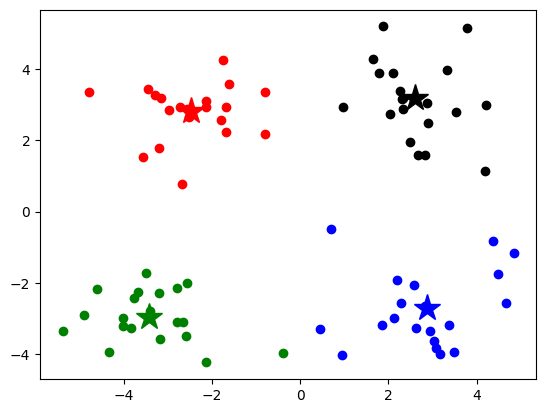

In [7]:
showCluster(data, k, centers)

### 画出蔟的作用区域

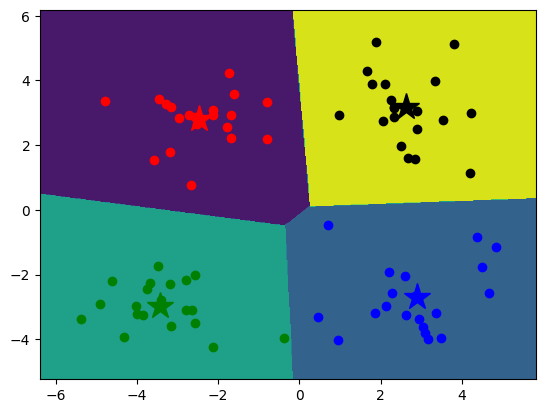

In [10]:
x_min, x_max = data[:, 0].min() - 1 , data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1 , data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

showCluster(data, k, centers)